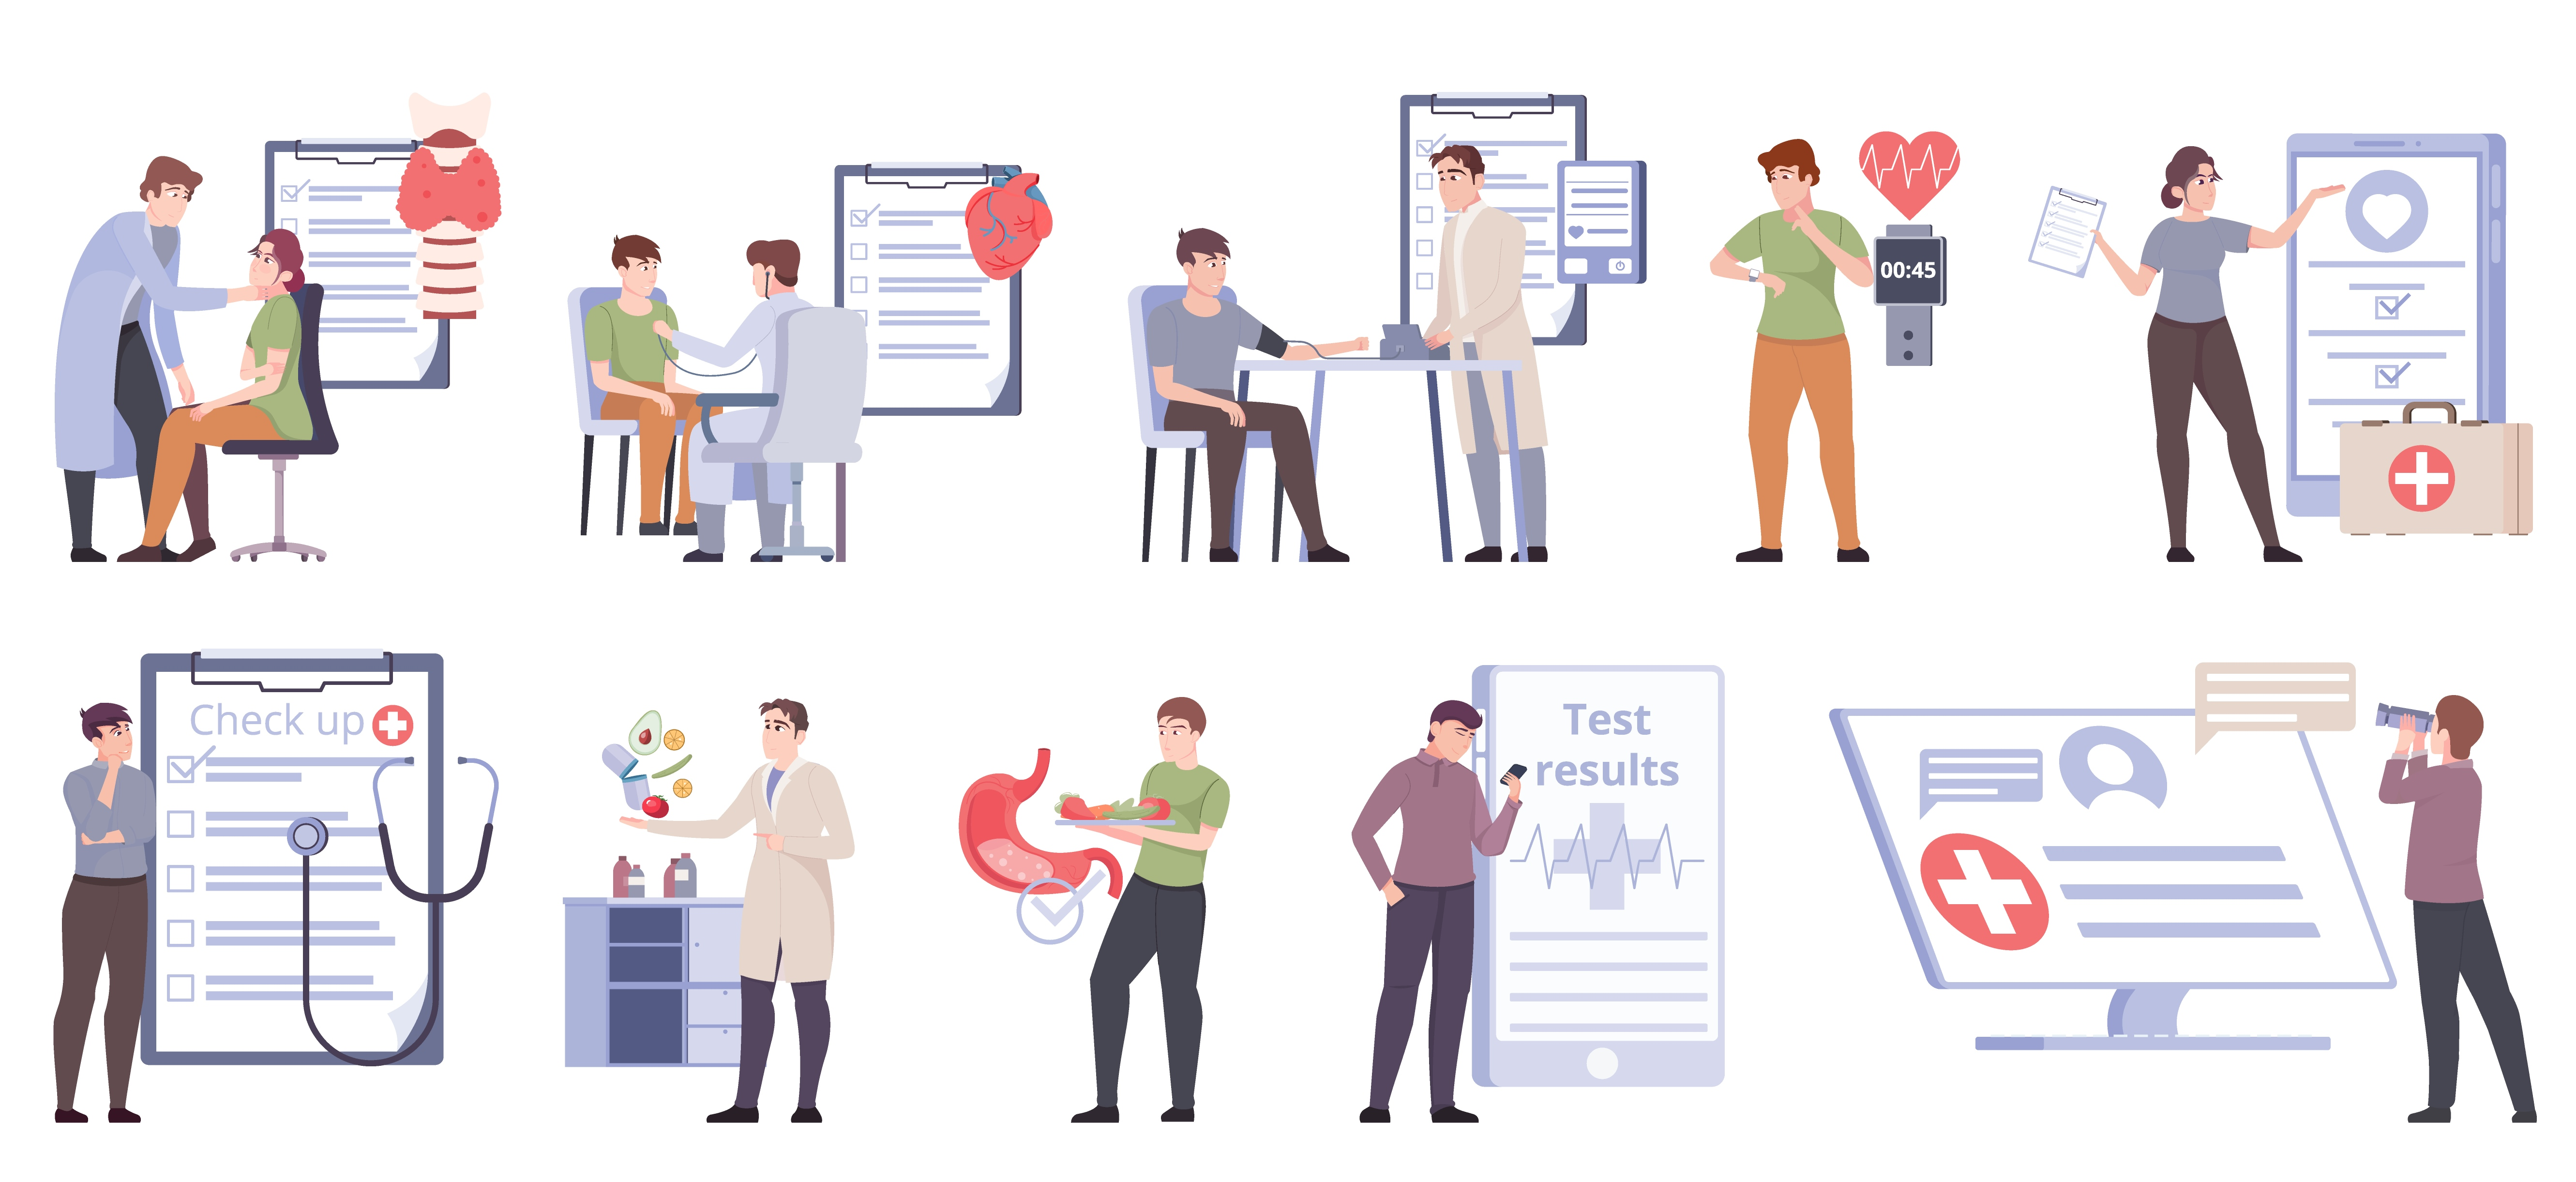

----------------------------------------------------------------------------------------------------------------------------
<h1 style="color: #ffffffff; text-align: center;"> Symptom2Diagnosis (S2D) </h1>

<p style="font-size:16px; color:#ffffffff;">
This project develops an <strong style="color:#e74c3c;">intelligent medical assistant</strong> 🤖
to help patients describe symptoms 🩺 and receive guidance on possible conditions and recommended tests 📝.
</p>

<p style="font-size:16px; color:#ffffffff;">
The system analyzes patient descriptions 🧾, extracts relevant information 🔍, and predicts potential diseases ⚠️.
It provides preliminary diagnostic suggestions and next steps 🛤️, helping patients make informed decisions before consulting a doctor 👨‍⚕️.
</p>

<h2 style="color:#2980b9;">Key Steps 🗂️:</h2>
<ul style="font-size:16px; color:#16a085;">
    <li>1️⃣ Processing data 📊</li>
    <li>2️⃣ Identifying relevant information 🔎</li>
    <li>3️⃣ Training a predictive model 🧠</li>
    <li>4️⃣ Providing a user-friendly interface 💻</li>
</ul>

----------------------------------------------------------------------------------------------------------------------------------



In [10]:
#Import Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
import string


In [9]:
#Read the data
df = pd.read_json("GenMedGPT-5k.json")

In [11]:
#Display the first 5 Rows
df.head()

,instruction,input,output
0,"If you are a doctor, please answer the medical...","Doctor, I have been experiencing sudden and fr...","Well, based on what you're telling me, it soun..."
1,"If you are a doctor, please answer the medical...","Doctor, I have been experiencing a hoarse voic...",It's possible that you have a vocal cord polyp...
2,"If you are a doctor, please answer the medical...","Hi, Doctor. I think I might have Turner syndro...","Okay, in that case, you will need to undergo a..."
3,"If you are a doctor, please answer the medical...","Doctor, I've been experiencing a condition cal...",You will need to undergo a complete physical s...
4,"If you are a doctor, please answer the medical...","Doctor, I think I've been poisoned. I drank so...",I'm sorry to hear that. We need to run a few t...


---------------------------------------------------------------
## Observation of First 5 Rows 👀
As you can see:
- The dataset contains three main columns:   <font color="red">instruction, input, and output</font>.
- Each row represents a **medical scenario** with a corresponding **doctor's response**.
- Each row represents a **medical scenario** with a corresponding **doctor's response**.
- Text in columns varies in length; some entries are quite long.
- No obvious missing values in the first 5 rows.
- This gives a quick overview of the type of **text data** we'll process for symptom-to-diagnosis prediction.
--------------------------------------------------------------------------------------


In [12]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452 entries, 0 to 5451
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  5452 non-null   object
 1   input        5452 non-null   object
 2   output       5452 non-null   object
dtypes: object(3)
memory usage: 127.9+ KB


--------------------------------------------------------------------------------------------------------------------------------
## Dataset Info ℹ️

- The dataset contains **5452 entries** (rows).  
- There are **2 columns**:  
  1. **input** – the patient's symptom description 🩺  
  2. **output** – the doctor's response or advice 👨‍⚕️  
- Both columns have **no missing values** (all 5452 rows are filled).  
- The data type for both columns is **object (text)**.  
- Memory usage is around **85 KB**, which is small and easy to handle.  

✅ This shows that the dataset is **clean and ready for text processing**, So Let's Keep going......

------------------------------------------------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------
## From the Previous Info, here what we will do
we will drop the **instruction** column for theses reasons :

- The 'instruction' column contains repeated text that is the same for most rows.  
- It **does not provide useful information** for predicting the doctor's response from the patient's input.  
- Keeping it would **add unnecessary complexity** to our model.  
- Therefore, we will drop it and keep only the **input** and **output** columns.

--------------------------------------------------------------------------------------------------------------------------------


In [13]:
clean_instruction='if you are a doctor please answer the medical questions based on the patients description'
df=df.drop('instruction',axis=1)


In [14]:
#Let's Clean the text data

def clean_text(text):
    text = str(text)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    text = re.sub(r"http\S+|www.\S+", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = text.lower()
    return text



df["input"] = df["input"].apply(clean_text)
df["output"] = df["output"].apply(clean_text)

df


,input,output
0,doctor i have been experiencing sudden and fre...,well based on what youre telling me it sounds ...
1,doctor i have been experiencing a hoarse voice...,its possible that you have a vocal cord polyp ...
2,hi doctor i think i might have turner syndrome,okay in that case you will need to undergo a c...
3,doctor ive been experiencing a condition calle...,you will need to undergo a complete physical s...
4,doctor i think ive been poisoned i drank some ...,im sorry to hear that we need to run a few tes...
...,...,...
5447,doctor i have an open wound in my nose and i a...,based on your symptoms you may have a complica...
5448,doctor i have an open wound in my nose and my ...,based on your symptoms you may have a staph in...
5449,doctor i have an open wound on my nose and im ...,hot flashes are a common symptom of menopause ...
5450,doctor i have a sore in my nose and i keep get...,it sounds like you have an open wound in your ...


-------------------------------------------------------------------------------------------------------------------------------
## Cleaning the Text Data 🧹

- Converted all entries to **string format** to avoid errors.  
- Removed **non-ASCII characters** (emojis, special symbols) to simplify text processing.  
- Removed **URLs** and **HTML tags** to keep only meaningful text.  
- Removed **punctuation** and **numbers** since they are not needed for symptom analysis.  
- Removed **extra spaces** and converted text to **lowercase** for consistency.  

✅ Now both the **input** (patient's symptoms) and **output** (doctor's response) columns
contain **clean, standardized text**, ready for preprocessing, feature extraction, and modeling.

----------------------------------------------------------------------------------------------------------------------------------


In [15]:
#Save the cleaned data to a CSV file
df.to_csv("clean_data.csv", index=False, encoding="utf-8")


-------------------------------------------------------------------------------------------------------------------------
## Semantic Similarity

-------------------------------------------------------------------------------------------------------------------------

In [16]:
#Check similarity between the columns
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

df = pd.read_csv("clean_data.csv")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

----------------------------------------------------------------------------------------------------------------------------------
## Why We Load the Sentence Transformer Model? 🤖✨

We load this model to convert both the **patient symptoms (input)** and the **doctor response (output)** into numerical embeddings.  
This allows us to measure how **similar** the question is to its answer.  

✔️ If similarity is high → the answer matches the question  
❌ If similarity is low → the answer does NOT match and should be reviewed  

why we do this ?!...

This step helps us validate the dataset before training the diagnostic model.

--------------------------------------------------------------------------------------------------------------------------------


In [17]:
# Calculate how similar the answer is to the question

def get_similarity(a, b):
    emb1 = model.encode(a, convert_to_tensor=True)
    emb2 = model.encode(b, convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2))

scores = []
flags = []

for i, row in df.iterrows():
    complaint = str(row["input"])
    diagnosis = str(row["output"])

    score = get_similarity(complaint, diagnosis)
    scores.append(score)

    flags.append(score > 0.30)

df["similarity_score"] = scores
df["not_logical"] = flags

In [18]:
df.to_csv("checked_results.csv", index=False)

In [19]:
df

,input,output,similarity_score,not_logical
0,doctor i have been experiencing sudden and fre...,well based on what youre telling me it sounds ...,0.686802,True
1,doctor i have been experiencing a hoarse voice...,its possible that you have a vocal cord polyp ...,0.548625,True
2,hi doctor i think i might have turner syndrome,okay in that case you will need to undergo a c...,0.299162,False
3,doctor ive been experiencing a condition calle...,you will need to undergo a complete physical s...,0.590608,True
4,doctor i think ive been poisoned i drank some ...,im sorry to hear that we need to run a few tes...,0.572287,True
...,...,...,...,...
5447,doctor i have an open wound in my nose and i a...,based on your symptoms you may have a complica...,0.736338,True
5448,doctor i have an open wound in my nose and my ...,based on your symptoms you may have a staph in...,0.744922,True
5449,doctor i have an open wound on my nose and im ...,hot flashes are a common symptom of menopause ...,0.824751,True
5450,doctor i have a sore in my nose and i keep get...,it sounds like you have an open wound in your ...,0.708361,True


In [20]:
# Filter only the logical pairs (where answer matches the question)
df_false = df[df["not_logical"] == False]

df_false

,input,output,similarity_score,not_logical
2,hi doctor i think i might have turner syndrome,okay in that case you will need to undergo a c...,0.299162,False
24,doctor i am experiencing some problems during ...,i see in order to diagnose any possible compli...,0.248066,False
33,doctor i was diagnosed with congenital rubella...,you need to undergo a corneal transplant,0.186543,False
48,doctor my baby has been very fussy and irritab...,okay well need to perform a complete physical ...,0.228306,False
49,doctor i have been experiencing severe stomach...,i see in that case we need to run some medical...,0.228594,False
...,...,...,...,...
5375,doctor i have been experiencing dizziness diff...,based on your symptoms it seems that you may b...,0.187981,False
5424,doctor ive been having heartburn fluid retenti...,based on your symptoms you may be experiencing...,0.280286,False
5425,hi doctor ive been experiencing sharp abdomina...,yes based on your symptoms it is possible that...,0.272098,False
5426,doctor ive been experiencing chills sharp abdo...,based on your symptoms its possible that you h...,0.290023,False


In [21]:
df_false.to_csv("only_false_rows.csv", index=False)

-------------------------------------------------------------------------------------------------------------------------
## Checking data by LLM📝

Why We Use LLM Check After Semantic Similarity?!!!

After computing the **semantic similarity** between the question and answer, there is still a high chance that the response might be:

- ❌ Medically illogical  
- ❌ Inappropriate for the question  
- ❌ Or simply incorrect, even if the similarity score is high  

This happens because **semantic similarity only measures linguistic similarity**, not medical correctness.

---

Therefore, we add an **LLM Check** using a model like **Google Gemini**, which aims to:

1. ✅ **Verify that the answer is medically logical and appropriate for the question**  
2. ✅ **Detect errors that semantic similarity cannot catch**  
3. ✅ **Evaluate the answer based on medical reasoning, not just similar words**  
4. ✅ **Flag answers that are incorrect regardless of similarity score**



# So, let's get into the full code and find out👀......

-------------------------------------------------------------------------------------------------------------------------

In [ ]:
!pip install google-genai



   ---------------------------------------- 0/6 [websockets]
   ------ --------------------------------- 1/6 [pyasn1]
   ------ --------------------------------- 1/6 [pyasn1]
   -------------------- ------------------- 3/6 [pyasn1-modules]
   -------------------- ------------------- 3/6 [pyasn1-modules]
   -------------------- ------------------- 3/6 [pyasn1-modules]
   -------------------- ------------------- 3/6 [pyasn1-modules]
   -------------------- ------------------- 3/6 [pyasn1-modules]
   -------------------------- ------------- 4/6 [google-auth]
   -------------------------- ------------- 4/6 [google-auth]
   --------------------------------- ------ 5/6 [google-genai]
   --------------------------------- ------ 5/6 [google-genai]
   ---------------------------------------- 6/6 [google-genai]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Sandy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
#Importing necessaey libraries for this step

import os        # os: to access environment variables securely (API keys)
import pandas as pd
from google import genai                #  google.genai: to connect to the Gemini API
from google.colab import userdata       #  google.colab.userdata: to securely load secrets stored in Colab


os.environ['GEMINI_API_KEY'] = userdata.get('GEMINI_API_KEY')

----------------------------------------------------------------------

**<h2 align="left"><font color=red>Note:</font></h2>**

 We don’t write the API key in the notebook for security reasons.  
Instead, we store it in <b>Colab → User secrets</b>, then load it safely using:

✔ <code>userdata.get()</code>  
✔ stored in <code>os.environ</code> so Gemini client can access it




---------------------------------------------------------------------

In [23]:
## Initialize the Gemini client using the stored API key
##This step connects us to the Gemini API.

try:
    client = genai.Client()
    print("Gemini client initialized successfully.")
except Exception as e:
    print(f"Error initializing client: {e}. Check your GEMINI_API_KEY.")


MODEL_NAME = "gemini-2.5-flash"

Gemini client initialized successfully.


-----------------------------------------------------------------------
## Why We Choose Gemini 2.5 Flash

We choose **Gemini 2.5 Flash** because:

- ⚡ **Fast for batch processing**
- 🧠 **Excellent at structured JSON reasoning**
- 💰 **Cheap for large datasets** (5000 rows)

-----------------------------------------------------------------------


In [25]:
def verify_diagnosis(symptoms, actual_diagnosis):
    """
    Sends the patient's symptoms and the doctor's diagnosis to the LLM for verification.
    """
    prompt = f"""
    You are a highly skilled medical AI assistant, specializing in diagnostic verification.
    Patient Symptoms (Input): '{symptoms}'.
    Doctor's Diagnosis (Output): '{actual_diagnosis}'.

    TASK:
    1. ASSESS if the symptoms provided highly suggest the recorded diagnosis.
    2. If the diagnosis is likely incorrect, provide the single most likely alternative diagnosis.
    3. STRICTLY output your response as a single, valid JSON object with the following keys:
       - "is_correct": (True or False)
       - "reasoning": (Detailed justification for your assessment)
       - "suggested_diagnosis": (The original diagnosis if correct, or the alternative if incorrect)
    """

    try:
        response = client.models.generate_content(
            model=MODEL_NAME,
            contents=prompt,
            config={"response_mime_type": "application/json"}
        )
        return response.text
    except Exception as e:
        return f'{{"is_correct": false, "reasoning": "API Error: {e}", "suggested_diagnosis": "N/A"}}'

-------------------------------------------------------------------------
## LLM Check Step

This function performs the **LLM Check** step.

### Why we need this step:
- Semantic similarity only checks **linguistic meaning**.
- But **LLM check evaluates medical correctness**, not just similarity.

### The LLM provides:
- ✔ **Whether the diagnosis is medically correct**
- ✔ **Reasoning**
- ✔ **Suggested alternative diagnosis**
- ✔ **Always returns results in JSON**

-----------------------------------------------------------------------------


In [27]:
#### LLM Verification on False Rows
## This code performs the LLM check on the dataset rows that failed the semantic similarity test.



df = pd.read_csv('/content/only_false_rows.csv')


df['llm_json_result'] = df.apply(
    lambda row: verify_diagnosis(row['input'], row['output']),
    axis=1
)


def safe_parse_json(json_string):
    try:
        return pd.read_json(json_string, typ='series')
    except ValueError:
        return pd.Series({'is_correct': None, 'reasoning': 'JSON Parsing Failed/LLM Error', 'suggested_diagnosis': 'Error'})


df_results = df['llm_json_result'].apply(safe_parse_json)
df = pd.concat([df.drop('llm_json_result', axis=1), df_results], axis=1)

print("\n--- Final Results DataFrame ---")
print(df)

/tmp/ipython-input-218584884.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(json_string, typ='series')
/tmp/ipython-input-218584884.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(json_string, typ='series')
/tmp/ipython-input-218584884.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(json_string, typ='series')
/tmp/ipython-input-218584884.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(json_string


--- Final Results DataFrame ---
                                                 input  \
0       hi doctor i think i might have turner syndrome   
1    doctor i am experiencing some problems during ...   
2    doctor i was diagnosed with congenital rubella...   
3    doctor my baby has been very fussy and irritab...   
4    doctor i have been experiencing severe stomach...   
..                                                 ...   
255  doctor i have been experiencing dizziness diff...   
256  doctor ive been having heartburn fluid retenti...   
257  hi doctor ive been experiencing sharp abdomina...   
258  doctor ive been experiencing chills sharp abdo...   
259  doctor i have been feeling a weakness in my lo...   

                                                output  similarity_score  \
0    okay in that case you will need to undergo a c...          0.299162   
1    i see in order to diagnose any possible compli...          0.248066   
2             you need to undergo a cornea

In [28]:
output_filename = 'diagnosis_verification_results.csv'
df.to_csv(output_filename, index=False, encoding='utf-8')
print(f"\n--- Results saved successfully ---")
print(f"File saved to: {output_filename}")
from google.colab import files
files.download(output_filename)


--- Results saved successfully ---
File saved to: diagnosis_verification_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>